In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
random_state = 64
target = 'delivery_time'

# Loading data

In [3]:
historical_data_df = pd.read_csv('datasets//historical_data.csv')
historical_data_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [4]:
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [5]:
historical_data_df['created_at'] = pd.to_datetime(historical_data_df['created_at'], format='%Y-%m-%d %H:%M:%S')
historical_data_df['actual_delivery_time'] = pd.to_datetime(historical_data_df['actual_delivery_time'], format='%Y-%m-%d %H:%M:%S')
historical_data_df['created_hours'] = historical_data_df['created_at'].dt.hour
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  Int64  
 1   store_id                                      197428 non-null  int64  
 2   store_primary_category                        192668 non-null  object 
 3   order_protocol                                196433 non-null  Int64  
 4   total_items                                   197428 non-null  int64  
 5   subtotal                                      197428 non-null  float64
 6   num_distinct_items                            197428 non-null  int64  
 7   min_item_price                                197428 non-null  float64
 8   max_item_price                                197428 non-null  float64
 9   total_onshift_dashers                         18

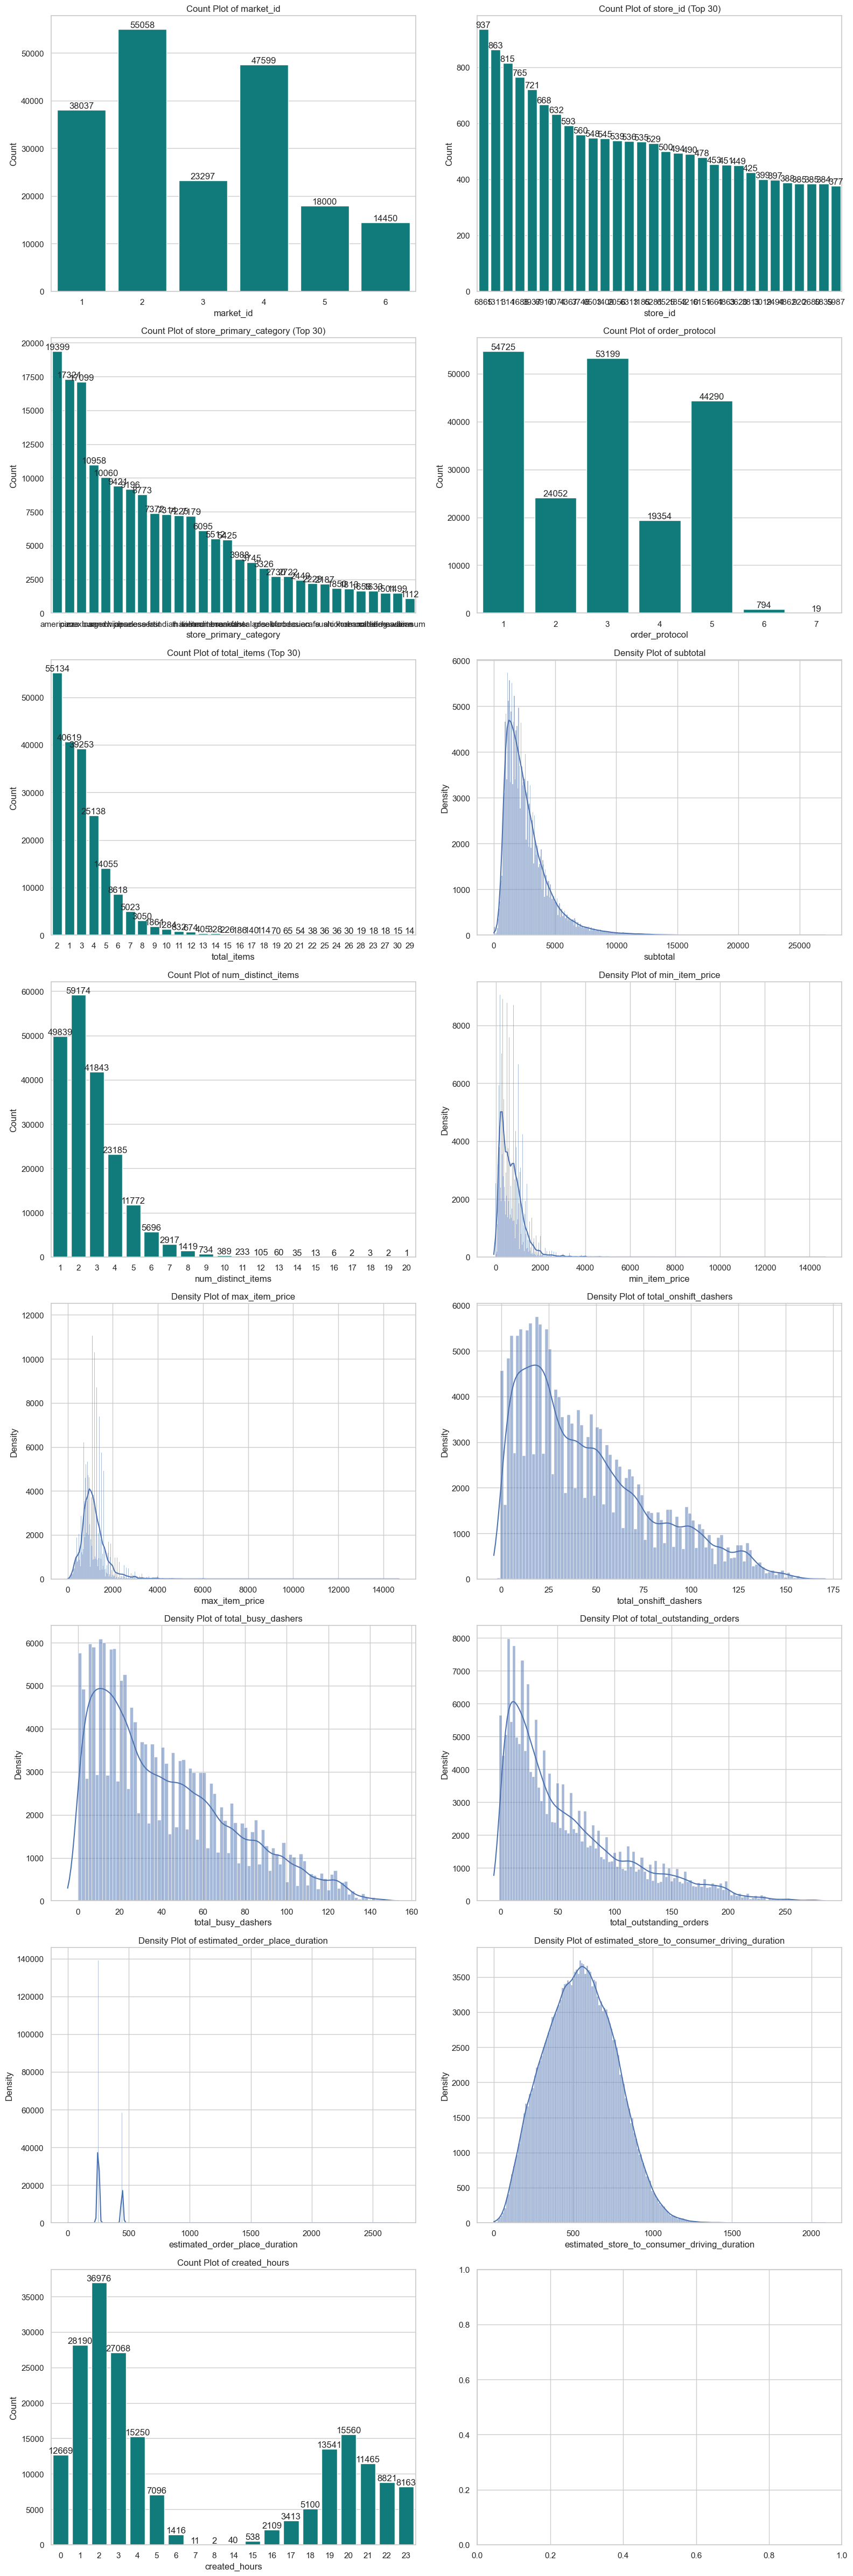

In [6]:
import importlib
import eda_util

importlib.reload(eda_util)
historical_data_plot_df = historical_data_df.copy()

# to int: market_id, order_protocol
float_to_int = ['market_id', 'order_protocol']
historical_data_plot_df[float_to_int] = historical_data_plot_df[float_to_int].astype('Int64')

#to float: subtotal, min_item_price, max_item_price, total___, estimated_order_place_duration
int_to_float = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration']
historical_data_plot_df[int_to_float] = historical_data_plot_df[int_to_float].astype('float64')

#drop created_at, actual_delivery_time

historical_data_plot_df = historical_data_plot_df.drop(['created_at', 'actual_delivery_time'], axis=1)

#Top 5: store_id, store_primary_category


historical_data_plot_df.info()

eda_util.plots.distributionPlots(historical_data_plot_df)

Text(0.5, 1.0, 'Delivery time distribution')

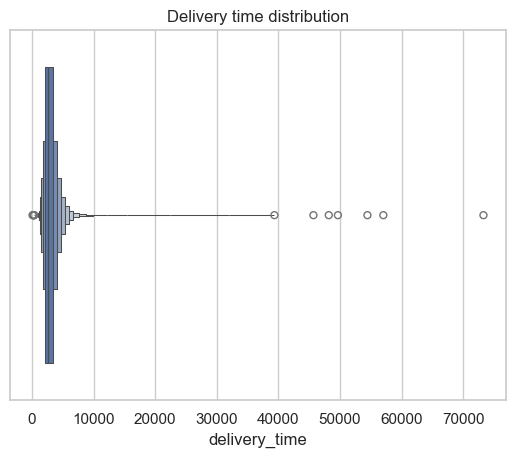

In [7]:
historical_data_df[target] = (historical_data_df['actual_delivery_time'] - historical_data_df['created_at']).dt.seconds
sns.boxenplot(historical_data_df[target], orient='h').set_title('Delivery time distribution')

# Data Cleaning - Missing values

## Market_id

### Fill NaN by store_id

In [8]:
historical_data_df['market_id'].value_counts()

market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64

Choose market_id by mode (for some reason some store corresponds to more than 1 market_id)

In [9]:
store_to_market = historical_data_df[['store_id', 'market_id']].dropna(subset='market_id').groupby('store_id').agg(pd.Series.mode).to_dict()['market_id']
store_to_market = {k: (v[0] if type(v) == np.ndarray else v) for k, v in store_to_market.items()}

In [10]:
historical_data_df['market_id'] = historical_data_df['store_id'].apply(lambda x: store_to_market[x] if x in store_to_market else None)
historical_data_df[historical_data_df['market_id'].isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_hours,delivery_time
120923,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,3,2745.0
152850,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,23,3001.0
186154,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,23,1917.0


In [11]:
historical_data_df[historical_data_df['store_id'].isin([3258, 4122, 5774])]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_hours,delivery_time
120923,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,3,2745.0
152850,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,23,3001.0
186154,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,23,1917.0


## Store Primary Category

In [12]:
store_to_primary = historical_data_df[['store_id', 'store_primary_category']].dropna(subset='store_primary_category').drop_duplicates(subset='store_id').to_dict()
store_to_primary = store_to_primary['store_primary_category']
store_to_primary = {k: (v[0] if type(v) == np.ndarray else v) for k, v in store_to_primary.items()}
print(store_to_primary)

{0: 'american', 1: 'mexican', 14: 'italian', 19: 'mexican', 21: 'italian', 31: 'sandwich', 41: 'cafe', 42: 'italian', 46: 'american', 75: 'chinese', 80: 'mexican', 92: 'sandwich', 123: 'singaporean', 151: 'burger', 160: 'breakfast', 169: 'mediterranean', 286: 'chinese', 290: 'japanese', 314: 'cafe', 320: 'american', 330: 'catering', 347: 'mexican', 366: 'sandwich', 368: 'filipino', 390: 'convenience-store', 392: 'american', 398: 'chinese', 401: 'indian', 402: 'sandwich', 411: 'greek', 438: 'american', 448: 'sandwich', 456: 'cafe', 457: 'japanese', 510: 'other', 514: 'korean', 515: 'sandwich', 545: 'asian', 565: 'indian', 577: 'barbecue', 595: 'mexican', 616: 'asian', 632: 'mexican', 643: 'fast', 653: 'indian', 663: 'sandwich', 670: 'italian', 671: 'italian', 676: 'american', 680: 'chinese', 681: 'burger', 761: 'sandwich', 770: 'barbecue', 775: 'convenience-store', 778: 'breakfast', 779: 'breakfast', 806: 'japanese', 809: 'american', 822: 'vietnamese', 840: 'other', 845: 'cajun', 847: '

In [13]:
historical_data_df['store_primary_category'] = historical_data_df['store_primary_category'].fillna(historical_data_df['store_id'].apply(lambda x: store_to_primary[x] if x in store_to_primary else None))
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197425 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192822 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

## Market Features

In [14]:
market_features = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

In [15]:
historical_data_df.loc[historical_data_df['total_onshift_dashers'].isna(), market_features].isna().all()

total_onshift_dashers       True
total_busy_dashers          True
total_outstanding_orders    True
dtype: bool

The NaN values are common

In [16]:
market_median = historical_data_df.dropna(subset='total_busy_dashers').groupby(['store_id', 'created_hours'])[market_features].median().round().to_dict()

for feature in market_features:
    func = lambda x: market_median[feature][tuple(x)] if tuple(x) in market_median[feature] else None
    historical_data_df[feature] = historical_data_df[['store_id', 'created_hours']].apply(func, axis=1)
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197425 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192822 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

Text(0.5, 1.0, 'Market features median by hours')

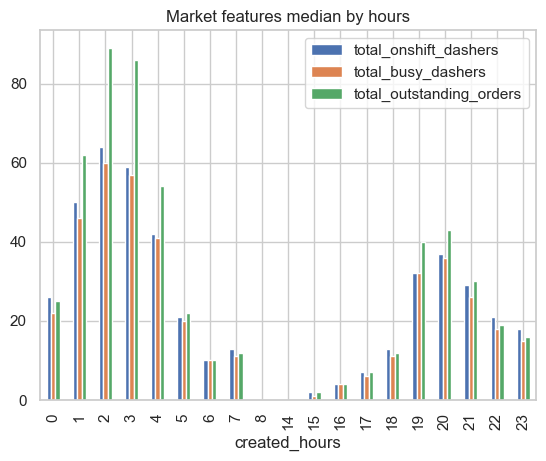

In [17]:
historical_data_df.dropna(subset='total_busy_dashers').groupby(['created_hours'])[market_features].median().plot(kind='bar').set_title('Market features median by hours')

In [18]:
s = (pd.merge_asof(
         historical_data_df[['store_id', 'created_hours'] + market_features].sort_values('created_hours').reset_index(),            
         historical_data_df[['store_id', 'created_hours'] + market_features].sort_values('created_hours').dropna(subset=market_features), 
         by='store_id',                                         
         on='created_hours', direction='nearest'                   
                  )
       .set_index('index')[[feature + '_y' for feature in market_features]].rename({feature + '_y': feature for feature in market_features}, axis=1)
       )
for feature in market_features:
       historical_data_df[feature] = historical_data_df[feature].fillna(s[feature], downcast='infer')
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197425 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192822 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

C:\Users\User\AppData\Local\Temp\ipykernel_27392\3749772903.py:10: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  historical_data_df[feature] = historical_data_df[feature].fillna(s[feature], downcast='infer')


Fill by store_id

<Axes: xlabel='created_hours', ylabel='total_onshift_dashers'>

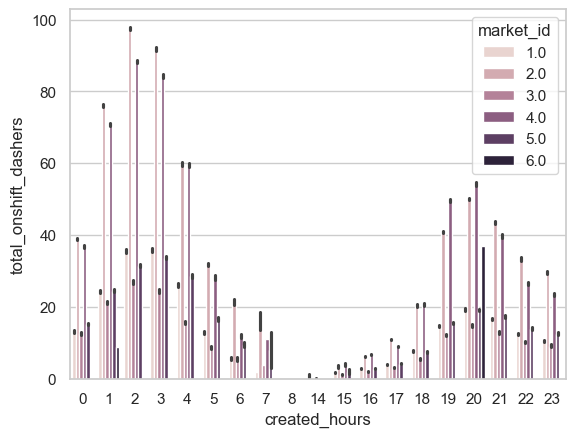

In [19]:
sns.barplot(historical_data_df, x='created_hours', y='total_onshift_dashers', hue='market_id')

In [20]:
s = (pd.merge_asof(
         historical_data_df.astype({'market_id': 'Int64'})[['market_id', 'created_hours'] + market_features].sort_values('created_hours').reset_index(),            
         historical_data_df.astype({'market_id': 'Int64'})[['market_id', 'created_hours'] + market_features].sort_values('created_hours').dropna(subset=market_features), 
         by='market_id', 
         on='created_hours', direction='nearest'                  
                  )
       .set_index('index')[[feature + '_y' for feature in market_features]].rename({feature + '_y': feature for feature in market_features}, axis=1)
       )

for feature in market_features:
       historical_data_df[feature] = historical_data_df[feature].fillna(s[feature], downcast='infer')
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197425 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192822 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

C:\Users\User\AppData\Local\Temp\ipykernel_27392\1931032918.py:11: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  historical_data_df[feature] = historical_data_df[feature].fillna(s[feature], downcast='infer')


Fill by closest hours

## Prediction from other models

### estimated_store_to_consumer_driving_duration

In [21]:
historical_data_df.groupby(['store_id', 'created_hours'])['estimated_store_to_consumer_driving_duration'].value_counts().to_frame().value_counts()

count
1        182577
2          6211
3           506
4            69
5            16
6             2
8             1
9             1
Name: count, dtype: int64

Most of the (`store_id`, `created_hours`) groups of `estimated_store_to_consumer_driving_duration` only has 1 entry, using it to fill the missing value may be too far from actual value.

## Remove data with no delivery_time

In [22]:
historical_data_df = historical_data_df.dropna(subset='delivery_time')
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197418 non-null  float64       
 1   created_at                                    197421 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197421 non-null  int64         
 4   store_primary_category                        192815 non-null  object        
 5   order_protocol                                196426 non-null  float64       
 6   total_items                                   197421 non-null  int64         
 7   subtotal                                      197421 non-null  int64         
 8   num_distinct_items                            197421 non-nu

# Model exploration

In [23]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder

c:\Users\User\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


### Drop datetime

In [24]:
historical_data_df_processed = historical_data_df.drop(['created_at', 'actual_delivery_time'], axis=1)
historical_data_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     197418 non-null  float64
 1   store_id                                      197421 non-null  int64  
 2   store_primary_category                        192815 non-null  object 
 3   order_protocol                                196426 non-null  float64
 4   total_items                                   197421 non-null  int64  
 5   subtotal                                      197421 non-null  int64  
 6   num_distinct_items                            197421 non-null  int64  
 7   min_item_price                                197421 non-null  int64  
 8   max_item_price                                197421 non-null  int64  
 9   total_onshift_dashers                         197421 

### Label Encode store_primary_category  

In [25]:
l_encoder = LabelEncoder()
historical_data_df_processed['store_primary_category'] = l_encoder.fit_transform(historical_data_df_processed['store_primary_category'])
historical_data_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     197418 non-null  float64
 1   store_id                                      197421 non-null  int64  
 2   store_primary_category                        197421 non-null  int32  
 3   order_protocol                                196426 non-null  float64
 4   total_items                                   197421 non-null  int64  
 5   subtotal                                      197421 non-null  int64  
 6   num_distinct_items                            197421 non-null  int64  
 7   min_item_price                                197421 non-null  int64  
 8   max_item_price                                197421 non-null  int64  
 9   total_onshift_dashers                         197421 

## Base Model

### train_test_split

In [26]:
X, y = historical_data_df_processed.drop(target, axis=1), historical_data_df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1 / 9, random_state=random_state)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (157936, 15)
Shape of y_train: (157936,)
Shape of X_val: (19742, 15)
Shape of y_val: (19742,)
Shape of X_test: (19743, 15)
Shape of y_test: (19743,)


### Train model

In [27]:
base_model = lgb.LGBMRegressor(random_state=random_state)
base_model.fit(X_train, y_train, eval_set=(X_val, y_val), categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])
print('RMSE for training set:', root_mean_squared_error(base_model.predict(X_train), y_train))
print('RMSE for validation set:', root_mean_squared_error(base_model.predict(X_val), y_val))

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7143
[LightGBM] [Info] Number of data points in the train set: 157936, number of used features: 15
[LightGBM] [Info] Start training from score 2860.532627
RMSE for training set: 960.4409094045334
RMSE for validation set: 1028.9677647921912


### Test result

In [28]:
print('RMSE for test set:', root_mean_squared_error(base_model.predict(X_test), y_test))

RMSE for test set: 1018.0559284353276


Text(0.5, 1.0, 'Feature importance of base_model (Gain)')

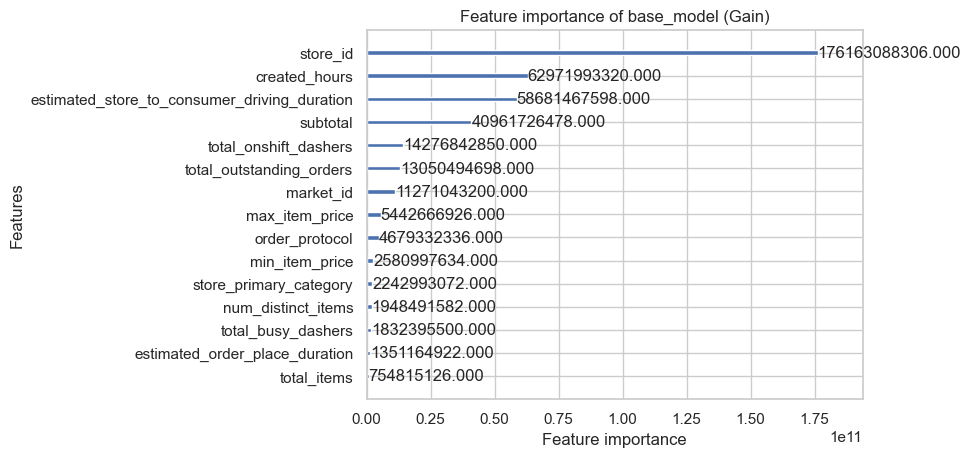

In [29]:
lgb.plot_importance(base_model, importance_type='gain').set_title('Feature importance of base_model (Gain)')

### Error analysis

In [30]:
def error_analysis(model, X_train, y_train, X_val, y_val, verbose=True) -> pd.DataFrame:
    # Training set errors
    model_train_error_df = abs(model.predict(X_train) - y_train).rename('abs_error').to_frame()
    model_train_error_df['actual_delivery_time'] = y_train
    model_train_error_df['rel_error'] = model_train_error_df['abs_error'] / model_train_error_df['actual_delivery_time']
    model_train_error_df['set'] = 'Train'

    # Validation set errors
    model_val_error_df = abs(model.predict(X_val) - y_val).rename('abs_error').to_frame()
    model_val_error_df['actual_delivery_time'] = y_val
    model_val_error_df['rel_error'] = model_val_error_df['abs_error'] / model_val_error_df['actual_delivery_time']
    model_val_error_df['set'] = 'Val'

    model_error_df = pd.concat([model_train_error_df, model_val_error_df])
    if verbose:
        display(model_error_df.groupby('set')['abs_error'].describe().T)

    return model_error_df

#### Training and Validation sets errors

In [31]:
base_model_error_df = error_analysis(base_model, X_train, y_train, X_val, y_val)

set,Train,Val
count,157936.000000,19742.000000
mean,644.107600,691.893002
std,712.443229,761.635161
min,0.006610,0.194446
25%,242.739671,263.370362
50%,505.665970,547.569211
75%,846.603974,906.701196
max,51070.845609,45130.333145


#### Error distribution

Text(0.5, 1.0, 'Absolute Error distribution')

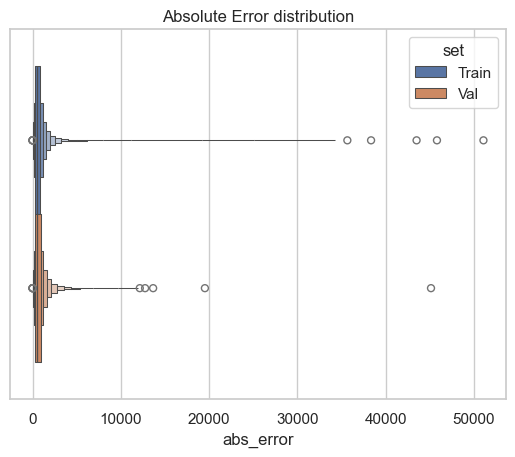

In [32]:
sns.boxenplot(base_model_error_df, x='abs_error', hue='set').set_title('Absolute Error distribution')

Text(0.5, 1.0, 'Relative Error distribution')

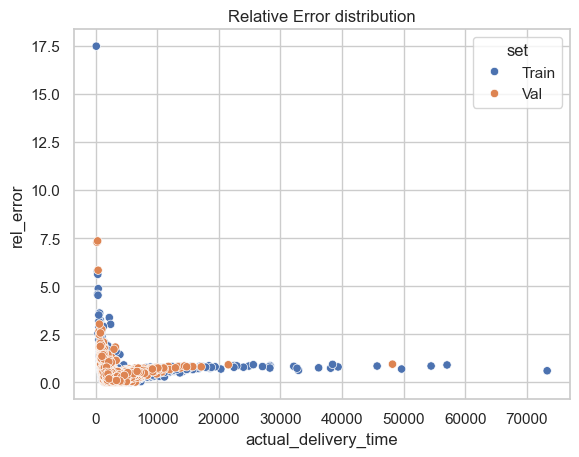

In [33]:
sns.scatterplot(base_model_error_df, x='actual_delivery_time', y='rel_error', hue='set').set_title('Relative Error distribution')

In [34]:
print('Relative error for training set:', base_model_error_df.loc[base_model_error_df['set'] == 'Train', 'rel_error'].mean())
print('Relative error for validation set:', base_model_error_df.loc[base_model_error_df['set'] == 'Val', 'rel_error'].mean())

Relative error for training set: 0.24034624502841187
Relative error for validation set: 0.25806436132899835


In [35]:
print('Relative error for test set:', np.mean(np.abs(base_model.predict(X_test) - y_test) / y_test))

Relative error for test set: 0.2592433735938487


## Base Model (Removing outliers)

### train_test_split and removing outliers

In [36]:
X, y = historical_data_df_processed.drop(target, axis=1), historical_data_df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

X_train, y_train = X_train[(np.abs(scipy.stats.zscore(y_train)) < 2)], y_train[(np.abs(scipy.stats.zscore(y_train)) < 2)] # Removing outliers

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1 / 9, random_state=random_state)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (152561, 15)
Shape of y_train: (152561,)
Shape of X_val: (19071, 15)
Shape of y_val: (19071,)
Shape of X_test: (19743, 15)
Shape of y_test: (19743,)


In [37]:
base_model_no_outliers = lgb.LGBMRegressor(random_state=random_state)
base_model_no_outliers.fit(X_train, y_train, eval_set=(X_val, y_val), categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])
print('RMSE for training set:', root_mean_squared_error(base_model_no_outliers.predict(X_train), y_train))
print('RMSE for validation set:', root_mean_squared_error(base_model_no_outliers.predict(X_val), y_val))

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7035
[LightGBM] [Info] Number of data points in the train set: 152561, number of used features: 15
[LightGBM] [Info] Start training from score 2733.935049
RMSE for training set: 689.502327604103
RMSE for validation set: 742.9799369745936


### Test set result

In [38]:
print('RMSE for test set:', root_mean_squared_error(base_model_no_outliers.predict(X_test), y_test))

RMSE for test set: 1024.6364364632261


Text(0.5, 1.0, 'Feature importance of base_model_no_outliers (Gain)')

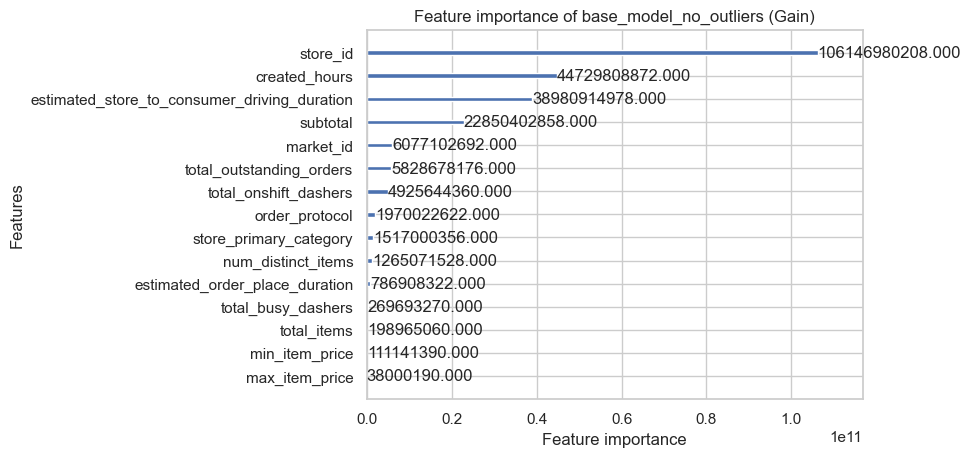

In [39]:
lgb.plot_importance(base_model_no_outliers, importance_type='gain').set_title('Feature importance of base_model_no_outliers (Gain)')

### Error Analysis

#### Training and Validation sets errors

In [40]:
base_model_no_outliers_error_df = error_analysis(base_model_no_outliers, X_train, y_train, X_val, y_val)

set,Train,Val
count,152561.000000,19071.000000
mean,543.224497,586.153331
std,424.643130,456.568056
min,0.000463,0.007854
25%,219.237115,233.577231
50%,454.669212,494.618567
75%,760.281145,821.775485
max,3190.217714,3446.777248


#### Error distribution

<Axes: xlabel='abs_error'>

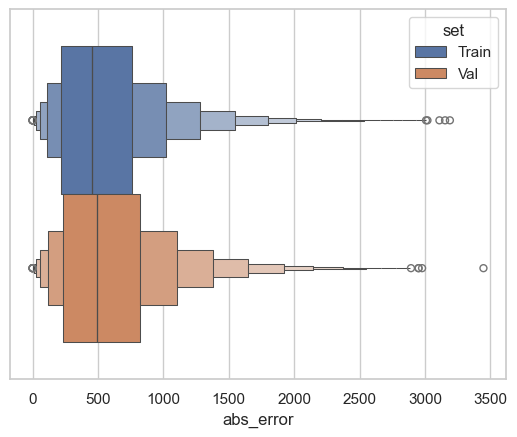

In [41]:
sns.boxenplot(base_model_no_outliers_error_df, x='abs_error', hue='set')

Text(0.5, 1.0, 'Relative Error distribution')

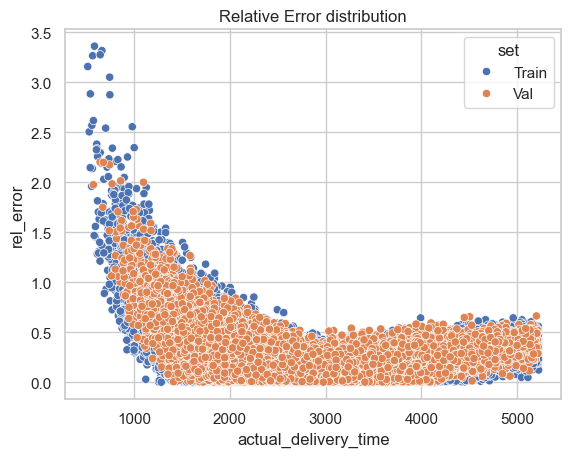

In [42]:
sns.scatterplot(base_model_no_outliers_error_df, x='actual_delivery_time', y='rel_error', hue='set').set_title('Relative Error distribution')

In [43]:
print('Relative error for training set:', base_model_no_outliers_error_df.loc[base_model_no_outliers_error_df['set'] == 'Train', 'rel_error'].mean())
print('Relative error for validation set:', base_model_no_outliers_error_df.loc[base_model_no_outliers_error_df['set'] == 'Val', 'rel_error'].mean())

Relative error for training set: 0.2174456175010885
Relative error for validation set: 0.23297270915950297


In [44]:
print('Relative error for test set:', np.mean(np.abs(base_model.predict(X_test) - y_test) / y_test))

Relative error for test set: 0.2592433735938487


## Custom loss function (relative error)

In [45]:
def rel_loss(y_true, y_pred):
    # loss = sum((y_pred - y_true) ** 2 / y_true ** 2)
    grad = (2 / y_true ** 2) * (y_pred - y_true)
    hess = 2 / (y_true ** 2)
    return grad, hess

def rel_error(y_true, y_pred):
    loss = (y_pred - y_true) ** 2 / y_true ** 2
    return 'rel_error', loss.mean(), False

In [46]:
X, y = historical_data_df_processed.drop(target, axis=1), historical_data_df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1 / 9, random_state=random_state)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (157936, 15)
Shape of y_train: (157936,)
Shape of X_val: (19742, 15)
Shape of y_val: (19742,)
Shape of X_test: (19743, 15)
Shape of y_test: (19743,)


In [47]:
cus_model = lgb.LGBMModel(objective=rel_loss, random_state=random_state)
cus_model.fit(X_train, y_train, eval_set=(X_val, y_val), eval_metric=rel_error, categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])
print('Relative error of training set:', rel_error(cus_model.predict(X_train), y_train)[1])
print('Relative error of validation set:', rel_error(cus_model.predict(X_val), y_val)[1])

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7143
[LightGBM] [Info] Number of data points in the train set: 157936, number of used features: 15
[LightGBM] [Info] Using self-defined objective function
Relative error of training set: 0.257702063094126
Relative error of validation set: 0.2514500909352922


### Test set result

In [48]:
print('Relative error of test set:', rel_error(cus_model.predict(X_test), y_test)[1])

Relative error of test set: 0.2464388469038121


### Error Analysis

#### Training and Validation sets errors

In [49]:
cus_model_error_df = error_analysis(cus_model, X_train, y_train, X_val, y_val)

set,Train,Val
count,157936.000000,19742.000000
mean,743.367569,747.838769
std,918.981159,901.581235
min,0.000185,0.008280
25%,226.515766,227.681314
50%,495.785979,497.588118
75%,946.117949,955.654152
max,69974.229855,45334.758984


#### Error distribution

Text(0.5, 1.0, 'Relative RMSE loss function absolute error distribution')

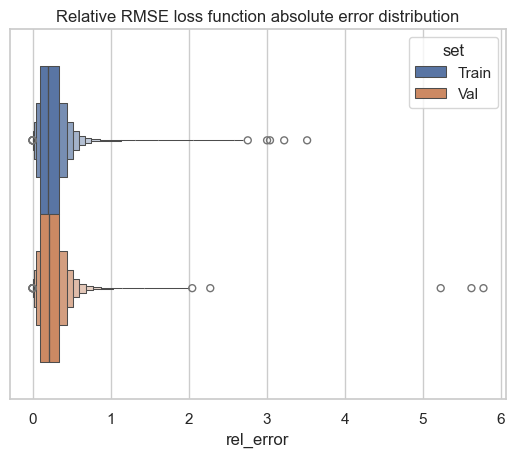

In [50]:
sns.boxenplot(cus_model_error_df, x='rel_error', hue='set').set_title('Relative RMSE loss function absolute error distribution')

Text(0.5, 1.0, 'Relative RMSE loss function relative error distribution')

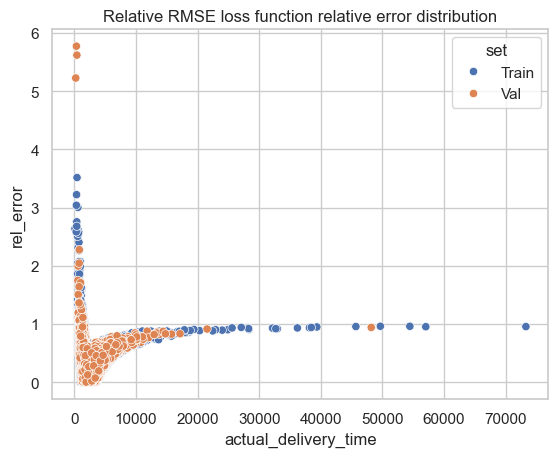

In [51]:
sns.scatterplot(cus_model_error_df, x='actual_delivery_time', y='rel_error', hue='set').set_title('Relative RMSE loss function relative error distribution')

## Custom loss function 2 (penalize high rel_error around small actual_delivery_time)

In [52]:
def rel_loss2(y_true, y_pred):
    # loss = sum((y_pred - y_true) ** 2 / y_true)
    grad = (2 / y_true) * (y_pred - y_true)
    hess = 2 / (y_true)
    return grad, hess

def rel_error2(y_true, y_pred):
    loss = (y_pred - y_true) ** 2 / y_true
    return 'rel_error', loss.mean(), False

In [53]:
X, y = historical_data_df_processed.drop(target, axis=1), historical_data_df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1 / 9, random_state=random_state)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (157936, 15)
Shape of y_train: (157936,)
Shape of X_val: (19742, 15)
Shape of y_val: (19742,)
Shape of X_test: (19743, 15)
Shape of y_test: (19743,)


In [54]:
cus_model_2 = lgb.LGBMModel(objective=rel_loss2, random_state=random_state)
cus_model_2.fit(X_train, y_train, eval_set=(X_val, y_val), eval_metric=rel_error2, categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])
print('Relative error of training set:', rel_error(cus_model_2.predict(X_train), y_train)[1])
print('Relative error of validation set:', rel_error(cus_model_2.predict(X_val), y_val)[1])

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7143
[LightGBM] [Info] Number of data points in the train set: 157936, number of used features: 15
[LightGBM] [Info] Using self-defined objective function
Relative error of training set: 0.16280979236933962
Relative error of validation set: 0.16630152323923017


### Test set result

In [55]:
print('Relative error of test set:', rel_error(cus_model_2.predict(X_test), y_test)[1])

Relative error of test set: 0.1580917406284755


### Error Analysis

#### Training and Validation sets errors

In [56]:
cus_model_2_error_df = error_analysis(cus_model_2, X_train, y_train, X_val, y_val)

set,Train,Val
count,157936.000000,19742.000000
mean,656.018608,672.348247
std,825.934821,812.012830
min,0.000233,0.034657
25%,219.766101,225.983483
50%,466.562696,479.836788
75%,826.854520,848.703087
max,69561.932031,45125.972677


#### Error distribution

Text(0.5, 1.0, 'Modified relative RMSE loss function absolute error distribution')

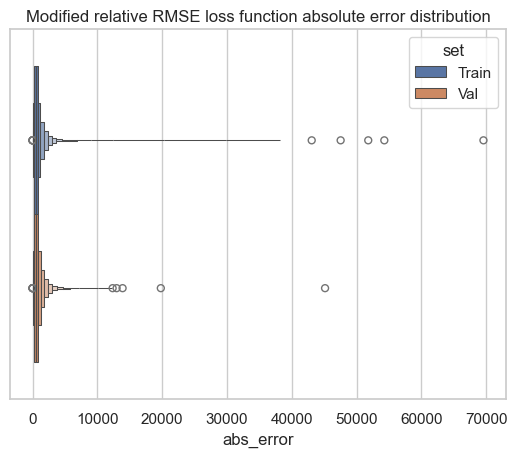

In [57]:
sns.boxenplot(cus_model_2_error_df, x='abs_error', hue='set').set_title('Modified relative RMSE loss function absolute error distribution')

Text(0.5, 1.0, 'Modified relative RMSE loss function relative error distribution')

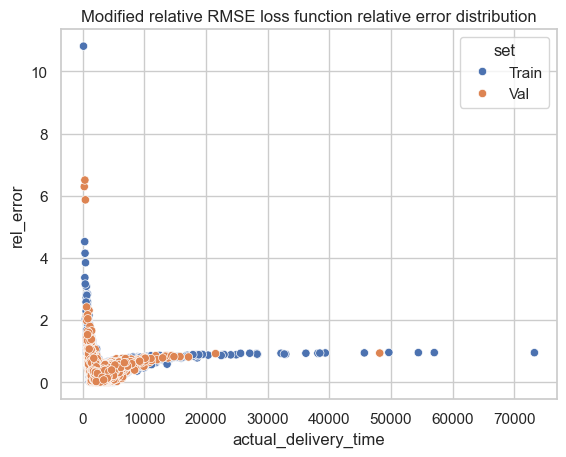

In [58]:
sns.scatterplot(cus_model_2_error_df, x='actual_delivery_time', y='rel_error', hue='set').set_title('Modified relative RMSE loss function relative error distribution')

## Custom loss function analysis

In [59]:
def rel_loss_k(k):
    def rel_loss(y_true, y_pred):
        # loss = sum((y_pred - y_true) ** 2 / y_true ** 2)
        grad = (2 / y_true ** k) * (y_pred - y_true)
        hess = 2 / (y_true ** k)
        return grad, hess
    return rel_loss

def rel_error_k(k):
    def rel_error(y_true, y_pred):
        loss = (y_pred - y_true) ** 2 / y_true ** k
        return 'rel_error', loss.mean(), False
    return rel_error

In [60]:
X, y = historical_data_df_processed.drop(target, axis=1), historical_data_df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1 / 9, random_state=random_state)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (157936, 15)
Shape of y_train: (157936,)
Shape of X_val: (19742, 15)
Shape of y_val: (19742,)
Shape of X_test: (19743, 15)
Shape of y_test: (19743,)


### Error Analysis

In [61]:
train_error = {}
val_error = {}
test_error = {}
error_dfs = {}
cus_models = {}

for k in [i / 10 for i in range(-40, 41)]:
    print(f'Training model with loss function k = {k}')
    cus_model_k = lgb.LGBMModel(objective=rel_loss_k(k), random_state=random_state, verbosity=-1)
    cus_model_k.fit(X_train, y_train, eval_set=(X_val, y_val), eval_metric=rel_error_k(k), categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])

    cus_models[k] = cus_model_k
    train_error[k] = rel_error(cus_model_k.predict(X_train), y_train)[1]
    val_error[k] = rel_error(cus_model_k.predict(X_val), y_val)[1]
    test_error[k] = rel_error(cus_model_k.predict(X_test), y_test)[1]

    cus_model_k_error_df = error_analysis(cus_model_k, X_train, y_train, X_val, y_val, verbose=False)

    error_dfs[k] = cus_model_k_error_df

Training model with loss function k = -4.0
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.9
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.8
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.7
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.6
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.5
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.4
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.3
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.2
[LightGBM] [Info] Using self-defined objective function
Training model with loss function k = -3.1
[LightGBM] [Info] Using self-defined objective function
Training m

In [62]:
cus_loss_analysis = pd.DataFrame([[k, train_error[k], val_error[k], test_error[k]] for k in train_error.keys()], columns=['k', 'train_error', 'val_error', 'test_error']).set_index('k')
cus_loss_analysis = cus_loss_analysis[(cus_loss_analysis < 0.2).all(axis=1)]
cus_loss_analysis

,train_error,val_error,test_error
k,,,
-2.1,0.189240,0.195869,0.170546
-1.4,0.167780,0.145876,0.165757
-1.2,0.196905,0.166776,0.148307
-1.1,0.118579,0.142791,0.184162
-0.6,0.091702,0.128731,0.120873
-0.5,0.088999,0.122108,0.119306
-0.4,0.088425,0.123825,0.117836
-0.3,0.089376,0.126167,0.118886
-0.2,0.091186,0.127127,0.120545


[Text(0.5, 1.0, 'Errors for different values of k'),
 Text(0, 0.5, 'Average relative error')]

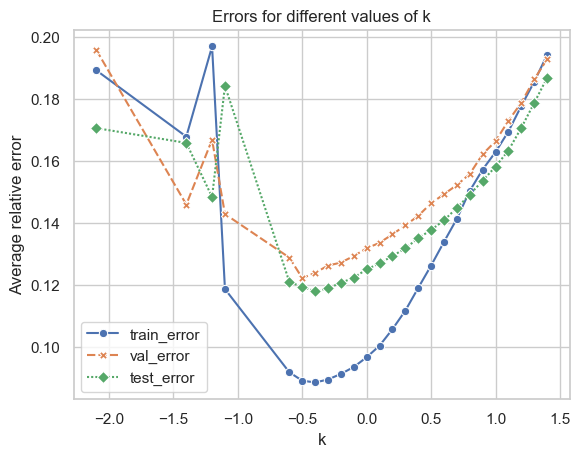

In [63]:
sns.lineplot(cus_loss_analysis, markers=['o', 'X', 'D']).set(title='Errors for different values of k', ylabel='Average relative error')

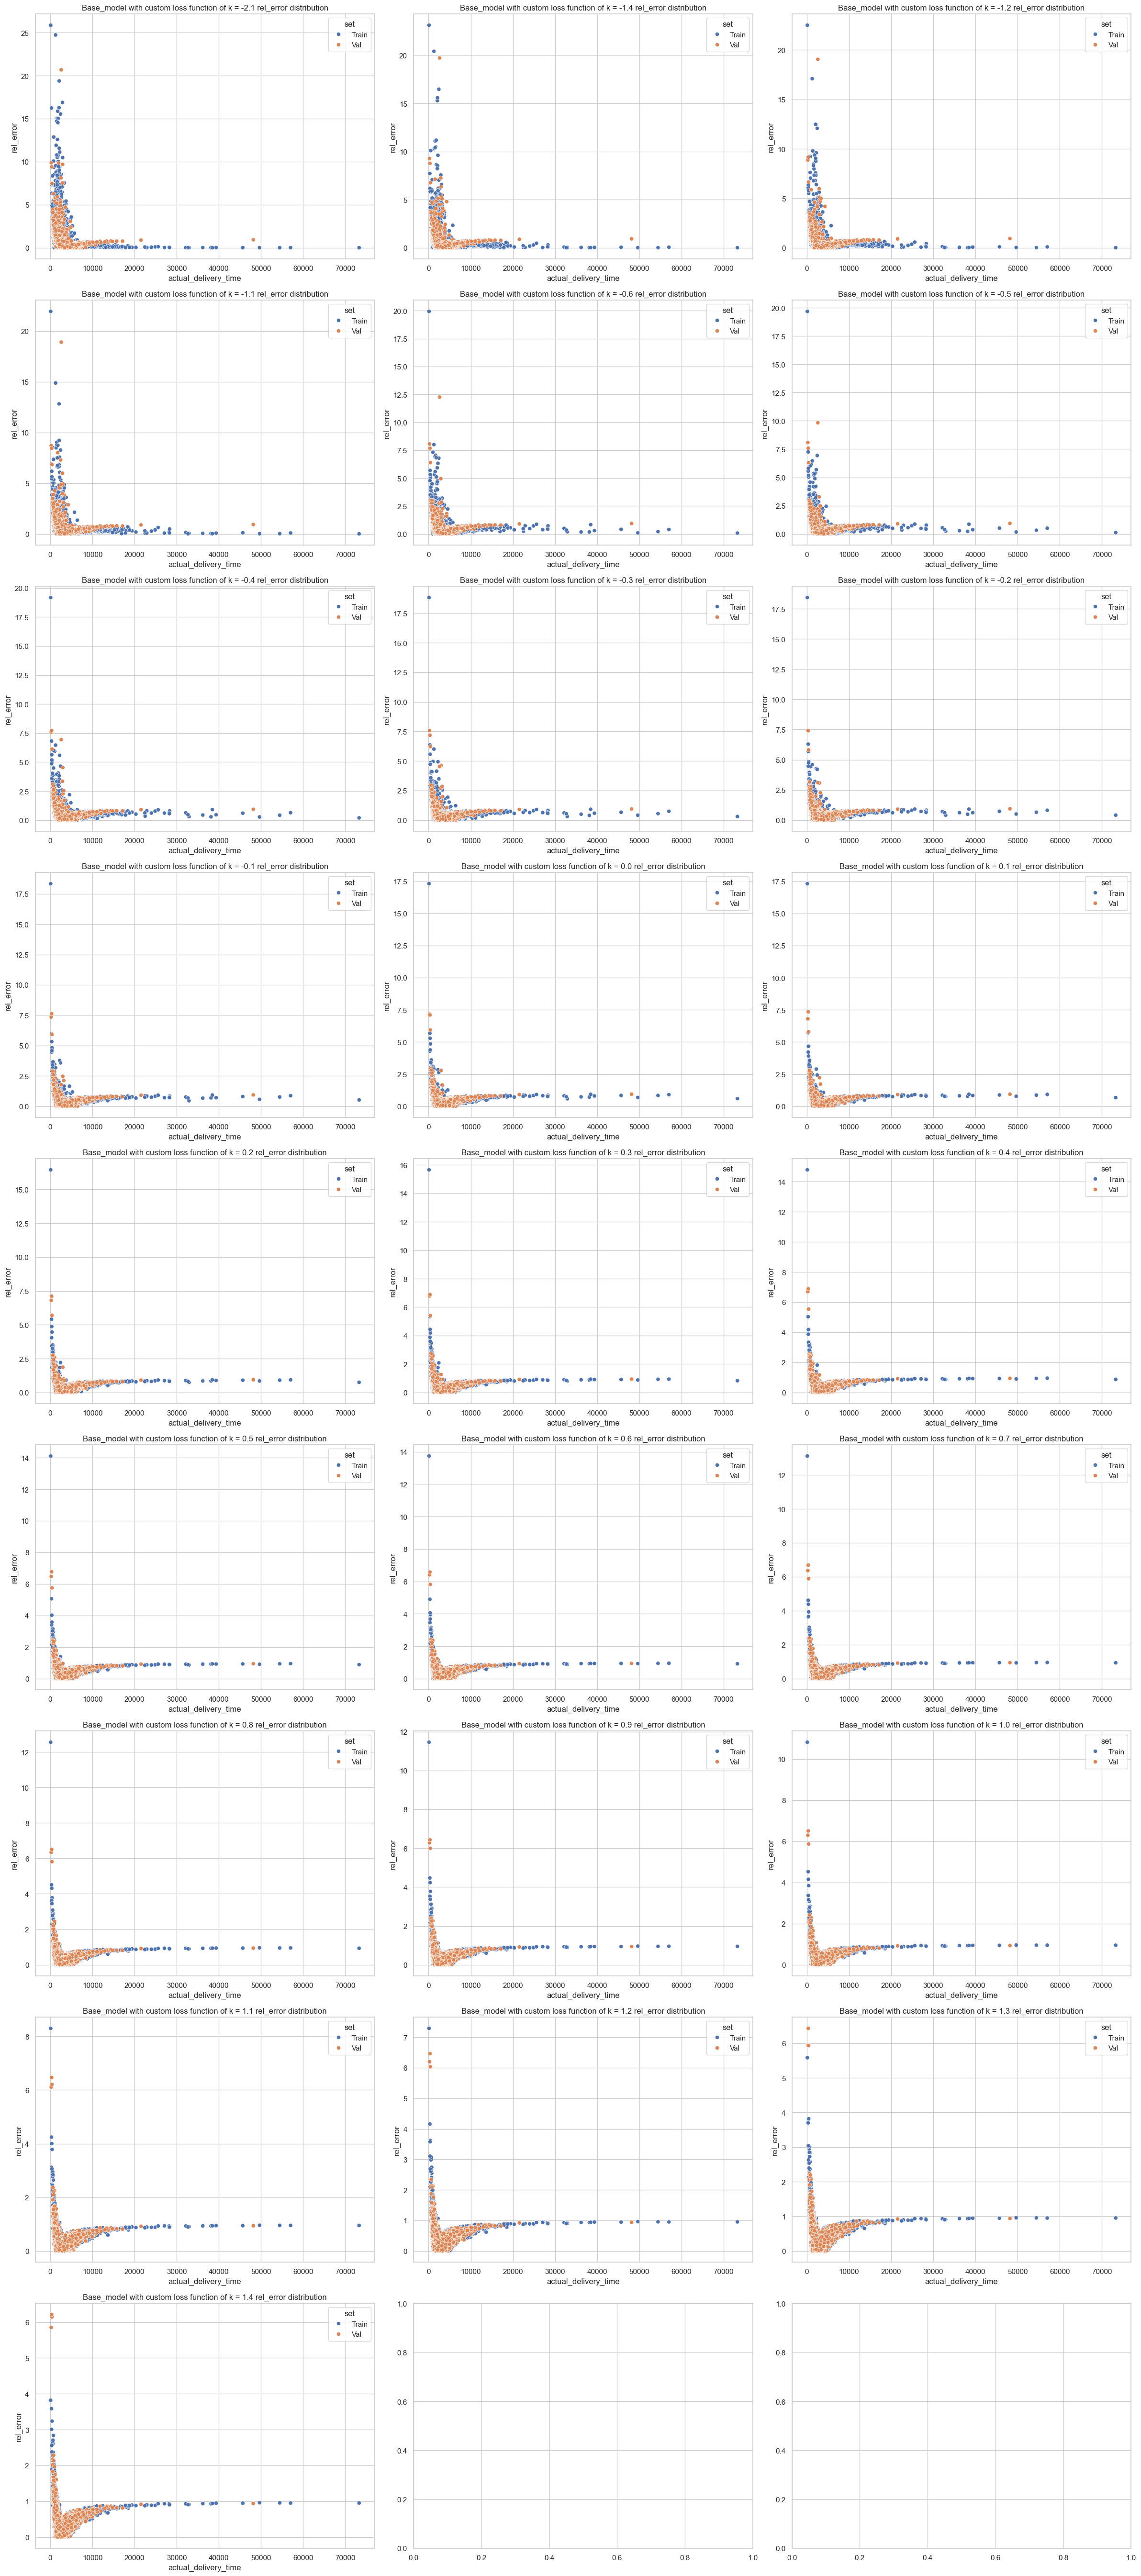

In [64]:
num_plots = len(cus_loss_analysis)
rows = (num_plots + 2) // 3  # Calculate the number of rows needed (3 plots per row)
cols = 3  # 3 plots per row
_, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8 * cols, 6 * rows))

# Iterate through the numerical features and create the plots
for i, k in enumerate(cus_loss_analysis.index):
    row_idx, col_idx = divmod(i, cols)  # Calculate the current row and column index
    sns.scatterplot(error_dfs[k], x='actual_delivery_time', y='rel_error', hue='set', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set(title=f'Base_model with custom loss function of k = {k} rel_error distribution')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots

plt.show()


In [65]:
best_k = -0.5

# RandomizedSearchCV

In [66]:
#from sklearn.model_selection import RandomizedSearchCV

### Drop datetime

In [67]:
# historical_data_df_k_fold = historical_data_df.drop(['created_at', 'actual_delivery_time'], axis=1)
# historical_data_df_k_fold.info()

### Label Encode store_primary_category

In [68]:
# l_encoder = LabelEncoder()
# historical_data_df_k_fold['store_primary_category'] = l_encoder.fit_transform(historical_data_df_k_fold['store_primary_category'])
# historical_data_df_k_fold.info()

## train_test_split

In [69]:
# X, y = historical_data_df_k_fold.drop(target, axis=1), historical_data_df_k_fold[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

# print('Shape of X_train:', X_train.shape)
# print('Shape of y_train:', y_train.shape)
# print('Shape of X_test:', X_test.shape)
# print('Shape of y_test:', y_test.shape)

In [70]:
# param_space = {
#     #'class_weight': None, 
#     'colsample_bytree': scipy.stats.uniform(0.5, 0.5), 
#     #'importance_type': 'split', 
#     'learning_rate': scipy.stats.loguniform(0.01, 0.99), 
#     'max_depth': list(range(2, 11)), 
#     #'min_child_samples': list(range(10, 51)), 
#     #'min_child_weight': 0.001, 
#     #'min_split_gain': 0.0, 
#     #'n_estimators': 100, 
#     #'n_jobs': None, 
#     'num_leaves': list(range(2, 512)), 
#     #'random_state': 1048576, 
#     #'reg_alpha': scipy.stats.uniform(0.0, 5.0),
#     #'reg_lambda': 0.0, 
#     'subsample': scipy.stats.uniform(0.5, 0.5), 
#     #'subsample_for_bin': 200000, 
#     #'subsample_freq': 0,
# }

In [71]:
# def rel_score_cv_k(k):
#     def rel_score_k(y_true, y_pred):
#         loss = (y_pred - y_true) ** 2 / y_true ** k
#         return loss.mean()
#     rel_score_cv = make_scorer(rel_score_k, greater_is_better=False)
#     return rel_score_cv

In [72]:
# clf = lgb.LGBMModel(objective=rel_loss_k(-0.4), random_state=1048576)
# grid = RandomizedSearchCV(clf, param_space, verbose=1, cv=10, n_jobs = -1, n_iter=100, scoring=rel_score_cv_k(-0.4), error_score='raise')
# grid.fit(X_train,y_train)

In [73]:
#grid.best_estimator_

In [74]:
# print('RMSE of training set:', root_mean_squared_error(grid.predict(X_train), y_train))
# print('Relative error of training set:', rel_error(grid.predict(X_train), y_train)[1])


## Test set result

In [75]:
# print('RMSE of test set:', root_mean_squared_error(grid.predict(X_test), y_test))
# print('Relative error of test set:', rel_error(grid.predict(X_test), y_test)[1])


## Error Analysis

In [76]:
# grid_error_df = abs(grid.predict(X_train) - y_train).rename('abs_error').to_frame()
# grid_error_df['actual_delivery_time'] = y_train
# grid_error_df['rel_error'] = grid_error_df['abs_error'] / grid_error_df['actual_delivery_time']

In [77]:
# _, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
# sns.scatterplot(grid_error_df, x='actual_delivery_time', y='abs_error', ax=axes[0]).set_title('RandomizedSearchCV Model with custom loss function abs_error distribution')
# sns.scatterplot(grid_error_df, x='actual_delivery_time', y='rel_error', ax=axes[1]).set_title('RandomizedSearchCV Model with custom loss function rel_error distribution')
# plt.tight_layout()
# plt.show()

In [78]:
# grid_analysis = X_train.loc[(grid_error_df['actual_delivery_time'] < 2000) & (grid_error_df['rel_error'] > 0.5), 'estimated_store_to_consumer_driving_duration'].to_frame()
# grid_analysis['actual_delivery_time'] = y_train[(grid_error_df['actual_delivery_time'] < 2000) & (grid_error_df['rel_error'] > 0.5)]
# grid_analysis['predicted_delivery_time'] = cus_model.predict(X_train[(grid_error_df['actual_delivery_time'] < 2000) & (grid_error_df['rel_error'] > 0.5)])
# grid_analysis


In [79]:
# (abs(grid.predict(X_train) - y_train) / y_train).to_frame().plot(kind='box')

In [80]:
# y_test_pred = grid.predict(X_test)
# y_test_pred = pd.DataFrame(y_test_pred, index=X_test.index)
# y_test.to_csv('datasets//test.csv')

# Tackle errors at small values

In [81]:
X, y = historical_data_df.drop(target, axis=1), historical_data_df[target]


In [82]:
short_time_threshold = 2000

## Proprocessing Pipeline

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler

class RandomOverSamplerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto', short_time_threshold=2000):
        self.sampling_strategy = sampling_strategy
        self.short_time_threshold = short_time_threshold
        self.sampler = RandomOverSampler(sampling_strategy=self.sampling_strategy)
        
    def fit(self, X, y=None):
        if y is None:
            raise ValueError("y cannot be None")
        # Store categorical labels for resampling
        self.y_categorical_ = y.apply(lambda x: 1 if x < self.short_time_threshold else 0)
        return self

    def transform(self, X, y=None):
        if y is None:
            raise ValueError("y cannot be None")
        # Resample using stored categorical labels
        self.X_reindexed = X.reset_index()
        X_resampled, _ = self.sampler.fit_resample(self.X_reindexed, self.y_categorical_)
        # Resample continuous target y using indices
        resampled_indices = X_resampled['index']
        X_resampled = X_resampled.set_index('index')
        y_resampled = y[resampled_indices]
        X, y = X_resampled, y_resampled.to_frame()
        return X

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X, y)

class preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features=None, drop_subset=None) -> None:
        self.categorical_features = categorical_features
        self.drop_subset = drop_subset
        self.encoder = LabelEncoder()
    
    def fit(self, X, y=None):
        if y is None:
            raise ValueError("y cannot be None")
        if self.categorical_features == None:
            self.categorical_features = [feature for feature in X.columns if X[feature].dtype == object]
            print('[preprocessor] [Info] Found non `int`, `float` or `bool` features, automatically assigning them as categorical features')
        return self

    def transform(self, X, y=None):
        if y is None:
            raise ValueError("y cannot be None")
        for feature in self.categorical_features:
            X[feature] = self.encoder.fit_transform(X[feature])
        X = X.drop(labels=self.drop_subset, axis=1)
        return X
    
    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X, y)
        
        


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=random_state
)

pipeline = Pipeline([
    ('preprocessing', preprocessor(drop_subset=['created_at', 'actual_delivery_time'])),
    ('resampling', RandomOverSamplerTransformer(sampling_strategy='minority', short_time_threshold=2000)),
])

# Fit the pipeline
X_train = pipeline.fit_transform(X_train, y_train)
y_train = y_train[X_train.index]


[preprocessor] [Info] Found non `int`, `float` or `bool` features, automatically assigning them as categorical features


In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1 / 9, random_state=random_state)

## Relative error model after resampling

In [86]:
resampled_model = lgb.LGBMModel(objective=rel_loss_k(best_k), random_state=random_state)
resampled_model.fit(X_train, y_train, eval_set=(X_val, y_val), eval_metric=rel_error_k(best_k), categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])
y_pred = resampled_model.predict(X_train)
print(f'Rel error of resampled training set is:', rel_error(y_train, y_pred)[1])

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6986
[LightGBM] [Info] Number of data points in the train set: 251032, number of used features: 15
[LightGBM] [Info] Using self-defined objective function
Rel error of resampled training set is: 0.1309483615057481


### Error Analysis

#### Training and Validation sets errors

In [87]:
resampled_model_error_df = error_analysis(resampled_model, X_train, y_train, X_val, y_val)

set,Train,Val
count,251032.000000,31380.000000
mean,597.426133,632.157632
std,581.314309,718.353288
min,0.003918,0.012556
25%,241.711384,254.558838
50%,479.490859,498.902212
75%,782.746657,814.857590
max,37762.823652,45214.613130


#### Error distribution

Text(0.5, 1.0, 'Resampled model absolute error distribution')

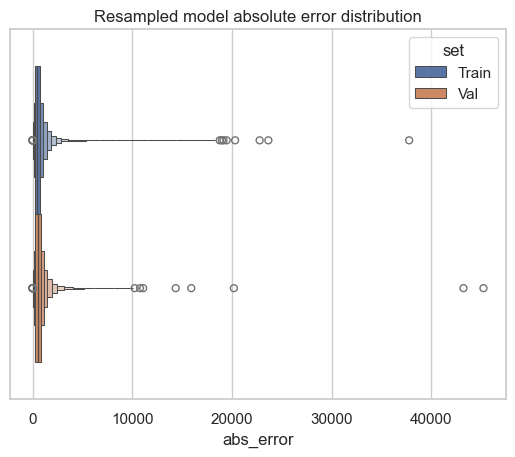

In [88]:
sns.boxenplot(resampled_model_error_df, x='abs_error', hue='set').set_title('Resampled model absolute error distribution')

(-0.2, 6.2)

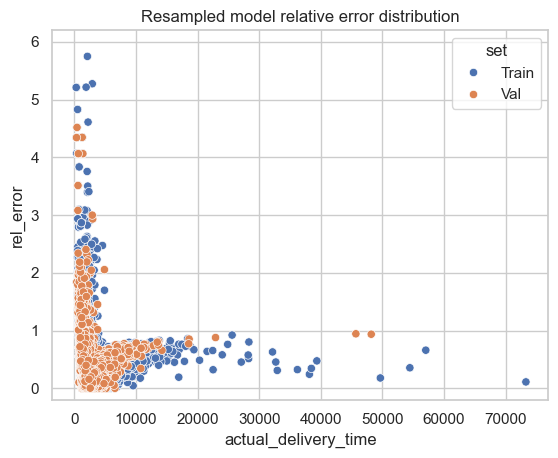

In [89]:
sns.scatterplot(resampled_model_error_df, x='actual_delivery_time', y='rel_error', hue='set').set_title('Resampled model relative error distribution')
plt.ylim(-0.2, 6.2)

In [90]:
print(f'Relative error of resampled test set is:', rel_error(y_test, resampled_model.predict(preprocessor(drop_subset=['created_at', 'actual_delivery_time']).fit_transform(X_test, y_test)))[1])

[preprocessor] [Info] Found non `int`, `float` or `bool` features, automatically assigning them as categorical features
Relative error of resampled test set is: 0.11934187331318855


## RMSE Model after resampling

In [91]:
resampled_model_rmse = lgb.LGBMModel(objective='regression', random_state=random_state)
resampled_model_rmse.fit(X_train, y_train, eval_set=(X_val, y_val), categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])
y_pred = resampled_model_rmse.predict(X_train)
print(f'Rel error of resampled training set is:', rel_error(y_train, y_pred)[1])

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6986
[LightGBM] [Info] Number of data points in the train set: 251032, number of used features: 15
[LightGBM] [Info] Start training from score 2413.386074
Rel error of resampled training set is: 0.09172418487847754


### Error analysis

#### Training and Validation sets errors

In [92]:
resampled_model_rmse_error_df = error_analysis(resampled_model_rmse, X_train, y_train, X_val, y_val)

set,Train,Val
count,251032.000000,31380.000000
mean,548.603870,580.673803
std,637.700003,722.792741
min,0.007202,0.007202
25%,198.441864,206.255609
50%,407.196264,429.752187
75%,698.360619,734.177818
max,52920.121943,45186.002554


#### Error distribution

Text(0.5, 1.0, 'Resampled RMSE model absolute error distribution')

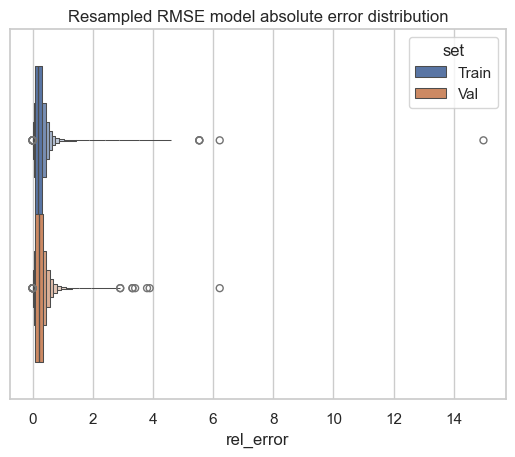

In [93]:
sns.boxenplot(resampled_model_rmse_error_df, x='rel_error', hue='set').set_title('Resampled RMSE model absolute error distribution')

(-0.2, 6.2)

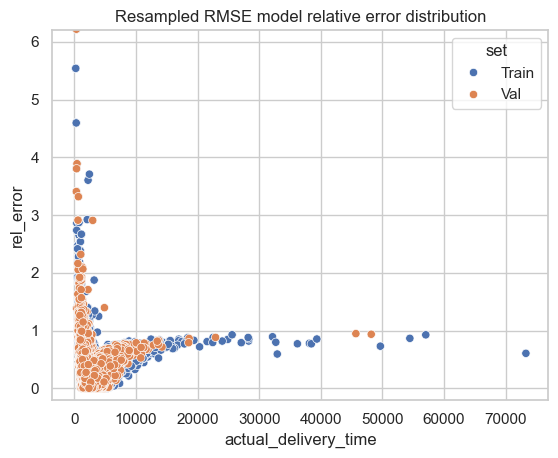

In [94]:
sns.scatterplot(resampled_model_rmse_error_df, x='actual_delivery_time', y='rel_error', hue='set').set_title('Resampled RMSE model relative error distribution')
plt.ylim(-0.2, 6.2)

In [95]:
print(f'Relative error of resampled test set is:', rel_error(y_test, resampled_model_rmse.predict(preprocessor(drop_subset=['created_at', 'actual_delivery_time']).fit_transform(X_test, y_test)))[1])

[preprocessor] [Info] Found non `int`, `float` or `bool` features, automatically assigning them as categorical features
Relative error of resampled test set is: 0.09181200027187547


# Final k-fold results

## Pipeline to resample the data

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=random_state
)

pipeline = Pipeline([
    ('preprocessing', preprocessor(drop_subset=['created_at', 'actual_delivery_time'])),
    ('resampling', RandomOverSamplerTransformer(sampling_strategy='minority', short_time_threshold=2000)),
])

# Fit the pipeline
X_train = pipeline.fit_transform(X_train, y_train)
y_train = y_train[X_train.index]


[preprocessor] [Info] Found non `int`, `float` or `bool` features, automatically assigning them as categorical features


## RMSE error model

In [97]:
def rel_score_cv_k(k):
    def rel_score_k(y_true, y_pred):
        loss = (y_pred - y_true) ** 2 / y_true ** k
        return loss.mean()
    rel_score_cv = make_scorer(rel_score_k, greater_is_better=False)
    return rel_score_cv

In [98]:
resampled_k_fold_rmse_model = lgb.LGBMRegressor(random_state=random_state, verbosity=-1)
resampled_k_fold_rmse_scores = cross_val_score(resampled_k_fold_rmse_model, X_train, y_train, cv=10, scoring=rel_score_cv_k(2), verbose=1, params={'categorical_feature': ['market_id', 'store_id', 'order_protocol', 'store_primary_category']})


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.3s finished


In [99]:
print(f'All relative scores: {- resampled_k_fold_rmse_scores}')
print(f'Average relative error: {- resampled_k_fold_rmse_scores.mean()}')

All relative scores: [0.08801291 0.0792653  0.08001024 0.08139625 0.08345402 0.08077618
 0.1338517  0.15753147 0.16139106 0.16251274]
Average relative error: 0.11082018821582548


## Relative error model

In [100]:
resampled_k_fold_model = lgb.LGBMModel(objective=rel_loss_k(best_k), random_state=random_state, verbosity=-1)
resampled_k_fold_scores = cross_val_score(resampled_k_fold_model, X_train, y_train, cv=10, scoring=rel_score_cv_k(2), verbose=1, params={'categorical_feature': ['market_id', 'store_id', 'order_protocol', 'store_primary_category']})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.6s finished


In [101]:
print(f'All relative scores: {- resampled_k_fold_scores}')
print(f'Average relative error: {- resampled_k_fold_scores.mean()}')

All relative scores: [0.11146262 0.09955275 0.09848504 0.09818463 0.10668169 0.10000773
 0.20223037 0.24187936 0.24859058 0.2535102 ]
Average relative error: 0.15605849565652394


Model chosen: resampled_k_fold_rmse_model

# Save Model

In [102]:
resampled_k_fold_rmse_model.fit(X_train, y_train, categorical_feature=['market_id', 'store_id', 'order_protocol', 'store_primary_category'])

LGBMRegressor(random_state=64, verbosity=-1)

In [104]:
print(f'Relative error of test set is:', rel_error(y_test, resampled_k_fold_rmse_model.predict(preprocessor(drop_subset=['created_at', 'actual_delivery_time']).fit_transform(X_test, y_test)))[1])

[preprocessor] [Info] Found non `int`, `float` or `bool` features, automatically assigning them as categorical features
Relative error of test set is: 0.09214931146293655


In [105]:
resampled_k_fold_rmse_model.booster_.save_model('doordash_delivery_model_final.txt')